In [1]:
%matplotlib inline
import glob
import importlib
import uproot
import awkward
import numpy as np
import uproot_methods
import matplotlib.pyplot as plt
import concurrent.futures
import functools
import time
import functools
import concurrent.futures
import pandas as pd
from tqdm.auto import tqdm

import utils
import manager
import plotting
from config import REDIS_URL

importlib.reload(plotting);
importlib.reload(manager);
importlib.reload(utils);

# plotting.bokeh_output_notebook()

In [2]:
m = manager.Manager()
m

<Manager: broker='redis://uaf-1.t2.ucsd.edu:50963', workers=0>

## Local workers
For rapid testing, we can start local workers in a `concurrent.futures.ProcessPoolExecutor`, one per new process.
Because the importing of `worker.py` is done in separate processes, if we change the source of `worker.py` and re-run the below cell, we'll have 5 new workers using the latest source code.

In [3]:
m.stop_all_workers(progress_bar=False)
time.sleep(0.5)
utils.start_local_workers(5)

(<concurrent.futures.process.ProcessPoolExecutor at 0x7f742820b518>,
 [<Future at 0x7f7392ab1320 state=running>,
  <Future at 0x7f7392ab1f28 state=running>,
  <Future at 0x7f7392ab1fd0 state=running>,
  <Future at 0x7f7392abb128 state=running>,
  <Future at 0x7f7392ab1e48 state=running>])

In [4]:
def f(x):
    time.sleep(0.1)
    return x
results = m.remote_map(f,range(15))

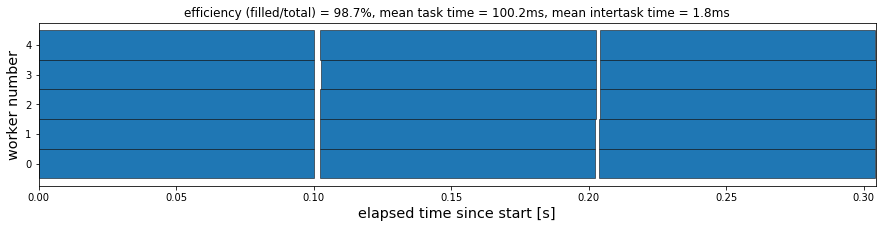

In [5]:
# plotting.plot_timeflow_bokeh(results)
plotting.plot_timeflow(results)

In [6]:
results[0]

{'args': 1,
 'job_num': 1,
 'read_bytes': 0,
 'result': 1,
 'task_id': '4bf088a3fe4a4f09',
 'tstart': 1567383639.7052758,
 'tstop': 1567383639.8054228,
 'worker_name': 'namin__uaf-10.t2.ucsd.edu__0.3450058',
 'write_bytes': 0}

In [7]:
pd.DataFrame(results)

,args,job_num,read_bytes,result,task_id,tstart,tstop,worker_name,write_bytes
0,1,1,0,1,4bf088a3fe4a4f09,1.567384e+09,1.567384e+09,namin__uaf-10.t2.ucsd.edu__0.3450058,0
1,2,2,0,2,4bf088a3fe4a4f09,1.567384e+09,1.567384e+09,namin__uaf-10.t2.ucsd.edu__0.3450056,0
2,0,0,0,0,4bf088a3fe4a4f09,1.567384e+09,1.567384e+09,namin__uaf-10.t2.ucsd.edu__0.3450055,0
3,4,4,0,4,4bf088a3fe4a4f09,1.567384e+09,1.567384e+09,namin__uaf-10.t2.ucsd.edu__0.3450059,0
4,3,3,0,3,4bf088a3fe4a4f09,1.567384e+09,1.567384e+09,namin__uaf-10.t2.ucsd.edu__0.3450057,0
5,5,5,0,5,4bf088a3fe4a4f09,1.567384e+09,1.567384e+09,namin__uaf-10.t2.ucsd.edu__0.3450056,0
6,6,6,0,6,4bf088a3fe4a4f09,1.567384e+09,1.567384e+09,namin__uaf-10.t2.ucsd.edu__0.3450055,0
7,8,8,0,8,4bf088a3fe4a4f09,1.567384e+09,1.567384e+09,namin__uaf-10.t2.ucsd.edu__0.3450057,0
8,9,9,0,9,4bf088a3fe4a4f09,1.567384e+09,1.567384e+09,namin__uaf-10.t2.ucsd.edu__0.3450059,0
9,7,7,0,7,4bf088a3fe4a4f09,1.567384e+09,1.567384e+09,namin__uaf-10.t2.ucsd.edu__0.3450058,0
